In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from skimage import io,color,img_as_float,transform
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from scipy import ndimage
import numpy as np
import time

In [17]:
FILENAME='fruits.jpg'
THRESHOLD_ABS=0.15
THRESHOLD_REL=0.55

# FILENAME='water_texture.jpg'
# THRESHOLD_ABS=0.2
# THRESHOLD_REL=0.55

# FILENAME='sunflowers.jpg'
# THRESHOLD_ABS=0.0
# THRESHOLD_REL=0.55

# FILENAME_FRUITS = 'fruits.jpg'
# THRESHOLD_ABS_FRUITS = 0.15
# THRESHOLD_REL_FRUITS = 0.55

# FILENAME_WATER = 'water_texture.jpg'
# THRESHOLD_ABS_WATER = 0.2
# THRESHOLD_REL_WATER = 0.55

# FILENAME_SUN = 'sunflowers.jpg'
# THRESHOLD_ABS_SUN = 0.0
# THRESHOLD_REL_SUN = 0.55

STEPS = 21
SIGMA_O = 2/1.414
SIGMA_RATIO = 1.2

In [3]:
def show_all_circles(image, cx, cy, rad, color='r'):
    """
    image: numpy array, representing the grayscsale image
    cx, cy: numpy arrays or lists, centers of the detected blobs
    rad: numpy array or list, radius of the detected blobs
    """
    import matplotlib.pyplot as plt
    from matplotlib.patches import Circle

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.imshow(image, cmap='gray')
    for x, y, r in zip(cx, cy, rad):
        circ = Circle((x, y), r, color=color, fill=False)
        ax.add_patch(circ)

    plt.title('%i circles' % len(cx))
    plt.show()

In [4]:
def find_circles_changing_filter(image,scales):

    coordinates=[[],[],[]]
    for s in scales:
        if FILENAME=='fruits.jpg':
            filtered = -ndimage.gaussian_laplace(image, sigma=s)
        elif FILENAME=='water_texture.jpg': 
            filtered = ndimage.gaussian_laplace(image, sigma=s)
        else:
            filtered = ndimage.gaussian_laplace(image, sigma=s)**2
        filtered*=s**2
        


        peaks = peak_local_max(
            filtered,
            threshold_abs=THRESHOLD_ABS,
            threshold_rel=THRESHOLD_REL,
            footprint=np.ones((3,3))
        )

        if len(peaks[:,0])>0:
            coordinates[0]=np.concatenate([coordinates[0],peaks[:,0]])
            coordinates[1]=np.concatenate([coordinates[1],peaks[:,1]])
            coordinates[2]=np.concatenate([coordinates[2],[s*1.414 for x in range(len(peaks[:,0]))]])

    return coordinates    

In [5]:
def find_circles_changing_image(original_image,scales):

    coordinates=[[],[],[]]

    for k in range(len(scales)): 

        rescale_factor=1.0/SIGMA_RATIO**k
        new_size=(int(original_image.shape[0]*rescale_factor),int(original_image.shape[1]*rescale_factor))
        image=transform.resize(original_image, new_size)

        if FILENAME=='fruits.jpg':
            filtered = -ndimage.gaussian_laplace(image, sigma=SIGMA_O)
        elif FILENAME=='water_texture.jpg': 
            filtered = ndimage.gaussian_laplace(image, sigma=SIGMA_O)
        else:
            filtered = ndimage.gaussian_laplace(image, sigma=SIGMA_O)**2
        
        
        #filtered*=SIGMA_O**2

            
        peaks = peak_local_max(
            filtered,
            threshold_abs=THRESHOLD_ABS,
            threshold_rel=THRESHOLD_REL,
            footprint=np.ones((3,3))
        )
        
        for i in range(len(peaks)):
            peaks[i]= [int(item/rescale_factor) for item in peaks[i]]

        if len(peaks[:,0])>0:
            coordinates[0]=np.concatenate([coordinates[0],peaks[:,0]])
            coordinates[1]=np.concatenate([coordinates[1],peaks[:,1]])
            coordinates[2]=np.concatenate([coordinates[2],[SIGMA_O*SIGMA_RATIO**k*1.414 for x in range(len(peaks[:,0]))]])

    return coordinates  

In [18]:
original_image = io.imread(FILENAME)

if len(original_image.shape)>2:
    gray_image = img_as_float(color.rgb2gray(original_image))
else:
    gray_image = img_as_float(original_image)

scales = np.array([SIGMA_O * (SIGMA_RATIO ** i) for i in range(STEPS)])

INFO: Operation by changing the image filter took: 1793.896 ms


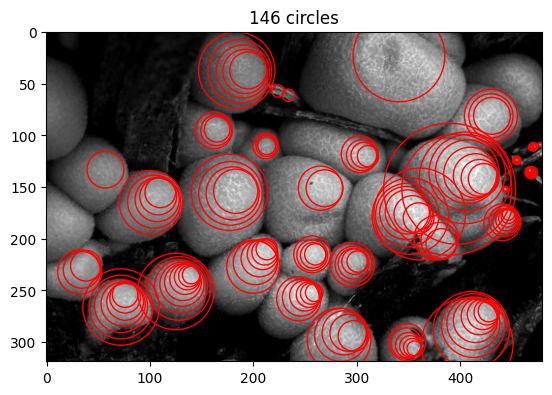

In [19]:
start = time.time()
coordinates = find_circles_changing_filter(gray_image,scales)
end = time.time()
print("INFO: Operation by changing the image filter took: %.3f ms" %  ((end - start)*1000))

show_all_circles(original_image, coordinates[1], coordinates[0],coordinates[2])


INFO: Operation by changing the image size took: 400.723 ms


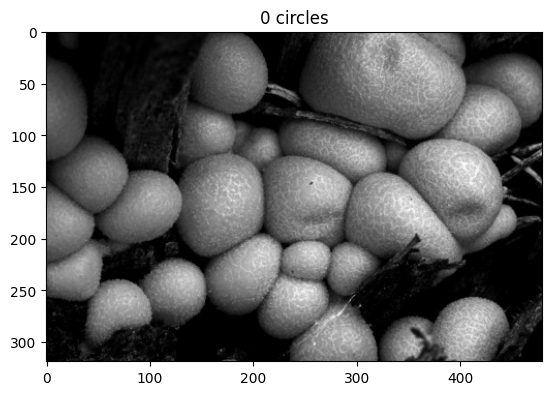

In [20]:
start = time.time()
coordinates=find_circles_changing_image(gray_image,scales)
end = time.time()
print("INFO: Operation by changing the image size took: %.3f ms" %  ((end - start)*1000))


show_all_circles(original_image, coordinates[1], coordinates[0],coordinates[2])
        
